<a href="https://colab.research.google.com/github/sreekanthmangalan/100daysofCode/blob/main/D_S_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://techlearn-cdn.s3.amazonaws.com/Data_analytics_specialization/capstone_project/survey_results_public.csv

--2021-12-27 13:19:36--  https://techlearn-cdn.s3.amazonaws.com/Data_analytics_specialization/capstone_project/survey_results_public.csv
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.66.60
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.66.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94603888 (90M) [application/vnd.ms-excel]
Saving to: ‘survey_results_public.csv’

survey_results_publ 100%[===================>]  90.22M   839KB/s    in 96s     

2021-12-27 13:21:13 (964 KB/s) - ‘survey_results_public.csv’ saved [94603888/94603888]



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
survey = pd.read_csv('survey_results_public.csv')

In [4]:
survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [5]:
survey.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
survey.shape

(64461, 61)

In [7]:
survey['Country']

0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64461, dtype: object

In [8]:
survey['Country'].nunique()

183

In [9]:
survey['Country'].unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic',
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Kyrgyzstan', 'Iran', 'Croatia', 'Egypt', 'Argentina',
       'Ghana', 'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guat

In [10]:
survey['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

**Analysis**

1) **Respondents**

In [11]:
survey['Respondent']

0            1
1            2
2            3
3            4
4            5
         ...  
64456    64858
64457    64867
64458    64898
64459    64925
64460    65112
Name: Respondent, Length: 64461, dtype: int64

In [12]:
df_country = survey.groupby('Country')['Respondent'].nunique().sort_values(ascending=False)
df_country


Country
United States                         12469
India                                  8403
United Kingdom                         3896
Germany                                3890
Canada                                 2191
                                      ...  
Fiji                                      1
Micronesia, Federated States of...        1
Gabon                                     1
Mali                                      1
Lesotho                                   1
Name: Respondent, Length: 183, dtype: int64

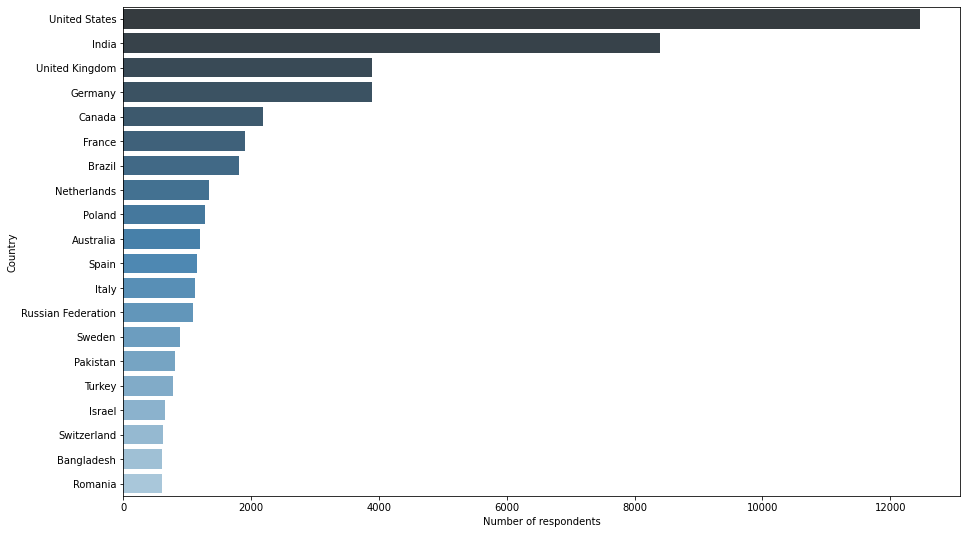

In [13]:
fig = plt.figure(figsize=(15,9))
sns.barplot(y=df_country[:20].index,x=df_country[:20],palette="Blues_r_d")
plt.xlabel('Number of respondents')
plt.show()

2) **Respondent** **Age**

In [20]:
survey_india = survey[survey['Country']=='India']
survey_india.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,USD,NaN,NaN,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very satisfied,"I’m not actively looking, but I am open to new...",C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,NaN,NaN,NaN,NaN,Yes,Extremely important,Very important,Better compensation;Growth or leadership oppor...,"Read company media, such as employee blogs or ...",Every few months,Yes,Yes,No,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Windows,20 to 99 employees,NaN,NaN,NaN,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
21,22,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,Indian rupee,INR,NaN,NaN,"Developer, full-stack;Engineer, data","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Man,NaN,Slightly dissatisfied,I am actively looking for a job,Java;JavaScript;Python,Java;Python,NaN,NaN,NaN,NaN,Not sure,NaN,Very important,Better compensation;Better work/life balance;W...,Company reviews from third party sites (e.g. G...,Every few months,No,Yes,No,Often: 1-2 days per week or more,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Windows,500 to 999 employees,NaN,NaN,NaN,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,10,2


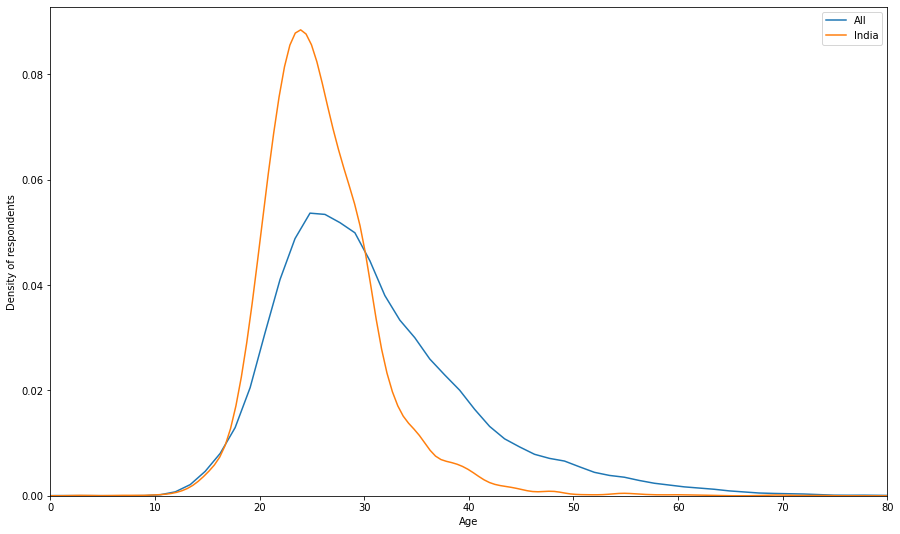

In [21]:
fig = plt.figure(figsize=(15,9))
sns.kdeplot(survey['Age'], label='All')
plt.ylabel('Density of respondents')
sns.kdeplot(survey_india['Age'], label='India')
plt.xlim(0,80)
plt.legend()
plt.show()

**3) Salaries**

In [22]:
survey_mean = survey.groupby(by='Country').mean()
survey_mean

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
Country,,,,,
Afghanistan,37251.690476,23.545455,5.946590e+08,148290.125000,46.500000
Albania,34042.500000,26.766667,1.123696e+05,25611.000000,48.392857
Algeria,38873.191489,28.019608,7.243125e+04,10362.812500,36.862069
Andorra,41261.461538,39.000000,8.200000e+04,88640.000000,42.000000
Angola,38941.444444,40.000000,7.913467e+04,5292.000000,72.333333
...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",37798.700000,29.000000,1.953347e+06,6280.611111,40.121951
Viet Nam,37170.456044,25.660606,4.767837e+14,28342.605769,42.371901
Yemen,48556.428571,31.000000,3.000000e+03,36000.000000,40.000000


In [23]:
survey_country_sorted = survey.groupby('Country').count().sort_values('Respondent',ascending=False)
survey_country_sorted

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
United States,12469,12438,12469,9619,11785,8632,8171,8152,9767,9767,8479,9763,10355,11732,12417,10074,10490,10294,9731,10660,10891,11633,8465,8551,9489,10956,9335,9165,10410,9116,8980,11353,10772,9320,11598,9412,7292,11324,11733,11282,11409,9508,10135,10916,8853,9686,11601,11560,9290,11611,10876,10843,10367,10701,7678,8401,11037,9093,11759,9945
India,8403,8384,8403,4413,6912,4261,2681,2668,5135,5135,5702,6134,5625,6873,8323,3539,5415,5461,5051,6031,6444,6884,5178,4279,5360,5913,4478,4348,5286,4405,4262,6765,5454,4486,6780,4596,4320,6179,7048,6341,6666,4927,6013,6249,4458,3808,6758,6629,5775,6799,5620,5620,5240,6393,5193,5040,5833,4029,6873,5176
United Kingdom,3896,3886,3896,3026,3677,2773,2591,2588,3111,3111,2518,3007,3237,3646,3882,3134,3274,3155,3108,3288,3367,3616,2583,2588,2907,3380,2972,2941,3315,2840,2778,3532,3362,2961,3599,2993,2279,3521,3633,3500,3554,3055,3104,3406,2715,3024,3595,3580,2860,3595,3362,3358,3220,3253,2324,2541,3439,2917,3662,3205
Germany,3890,3880,3890,3086,3676,2546,2313,2311,2897,2897,2596,2986,3072,3570,3870,3170,3341,3174,2874,3323,3463,3633,2541,2578,3060,3411,2750,2649,3044,2714,2619,3594,3377,2744,3603,2784,2466,3536,3642,3539,3574,2846,3231,3456,2572,2938,3619,3605,2987,3619,3410,3403,3281,2959,2220,2457,3440,2708,3655,2932
Canada,2191,2185,2191,1654,2053,1442,1350,1345,1595,1595,1494,1725,1720,2005,2181,1712,1827,1799,1589,1862,1907,2038,1504,1535,1670,1919,1536,1509,1729,1571,1539,1994,1887,1529,2042,1549,1359,1987,2071,1973,2012,1560,1753,1907,1417,1660,2039,2035,1586,2042,1887,1880,1797,1841,1384,1525,1953,1500,2047,1623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liechtenstein,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Mali,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
Marshall Islands,1,0,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0


In [24]:
survey_mean_sorted = survey_mean.loc[survey_country_sorted.index]
survey_mean_sorted

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
Country,,,,,
United States,29970.597803,33.667491,1.359823e+243,208826.496443,41.792403
India,34084.377722,25.960186,3.729985e+32,28751.271364,40.345247
United Kingdom,31489.811602,33.127231,3.859600e+09,140849.074189,39.169695
Germany,31569.544730,30.890311,4.369293e+06,92508.647339,40.272987
Canada,29739.916020,32.225151,7.407407e+45,115101.775465,40.645833
...,...,...,...,...,...
Liechtenstein,48102.000000,NaN,NaN,NaN,45.000000
Mali,42012.000000,NaN,NaN,NaN,NaN
Marshall Islands,36434.000000,NaN,NaN,NaN,NaN


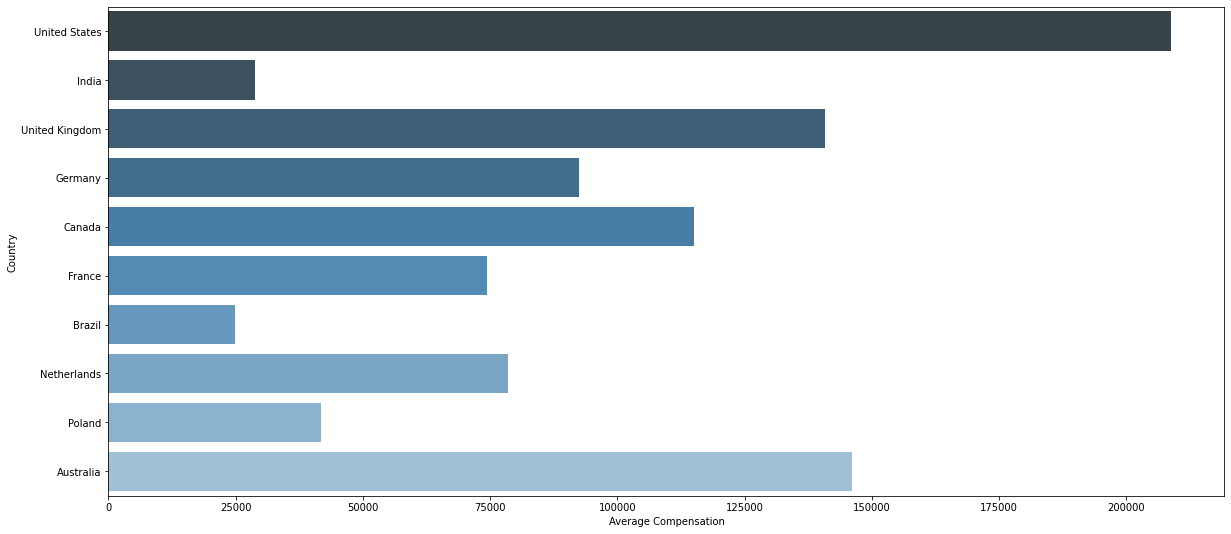

In [25]:
fig = plt.figure(figsize=(20,9))
sns.barplot(y=survey_mean_sorted.head(10).index,x='ConvertedComp',data=survey_mean_sorted.head(10),palette='Blues_r_d')
plt.xlabel('Average Compensation')
plt.show()

**4) Maximum Salary by Profession** 

In [26]:
survey['DevType'][0]

'Developer, desktop or enterprise applications;Developer, full-stack'

In [27]:
survey['DevType'][1]

'Developer, full-stack;Developer, mobile'

In [28]:
survey['DeveloperType'] = survey['DevType'].str.split(';')
survey['DeveloperType'][1]

['Developer, full-stack', 'Developer, mobile']

In [29]:
survey_exploded_devs = survey.explode('DeveloperType')
survey.drop(columns='DeveloperType', inplace=True)
survey_exploded_devs.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,DeveloperType
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,"Developer, desktop or enterprise applications"
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,"Developer, full-stack"


In [30]:
survey_exploded_devs.drop(columns='DevType',inplace=True)
survey_exploded_devs.dropna(subset=['ConvertedComp'],inplace=True)

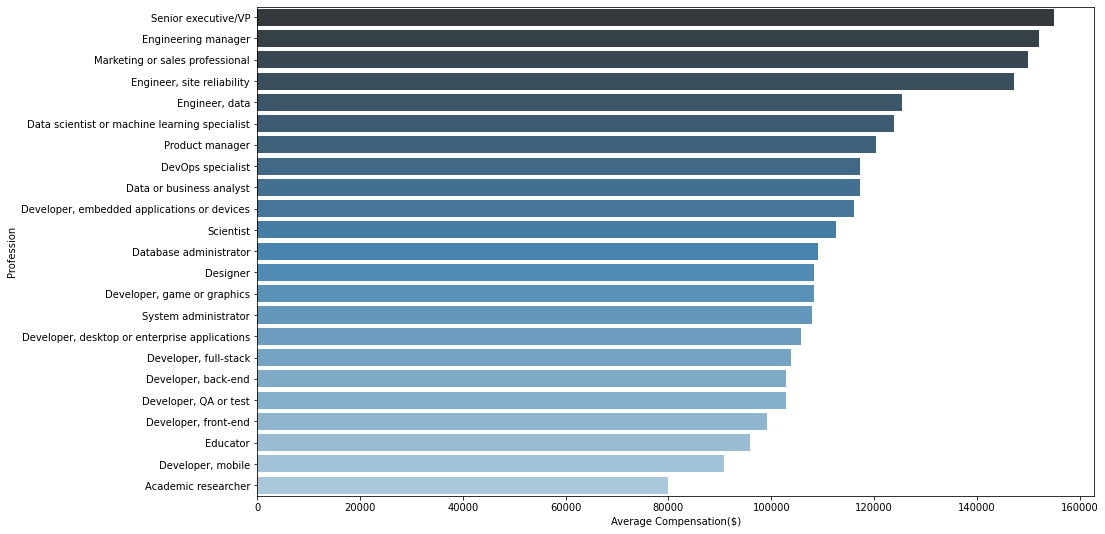

In [31]:
dev_compensation = survey_exploded_devs.groupby('DeveloperType')['ConvertedComp'].mean().sort_values(ascending=False)

fig=plt.figure(figsize=(15,9))
sns.barplot(x=dev_compensation.values,y=dev_compensation.index,palette='Blues_r_d')
plt.xlabel('Average Compensation($)')
plt.ylabel('Profession')
plt.show()

In [32]:
dev_compensation

DeveloperType
Senior executive/VP                              155010.026515
Engineering manager                              152102.136316
Marketing or sales professional                  149901.096096
Engineer, site reliability                       147103.356946
Engineer, data                                   125454.218274
Data scientist or machine learning specialist    123911.183276
Product manager                                  120308.004896
DevOps specialist                                117256.690296
Data or business analyst                         117228.031972
Developer, embedded applications or devices      116052.122971
Scientist                                        112595.875727
Database administrator                           109036.082873
Designer                                         108321.920234
Developer, game or graphics                      108271.385501
System administrator                             107815.875626
Developer, desktop or enterprise applicat

**5) Unemployment**

In [33]:
employment_country_df = pd.pivot_table(survey,index='Country',columns='Employment', values='Respondent', aggfunc='count')
employment_country_df

Employment,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Student
Country,,,,,,,
Afghanistan,38.0,5.0,10.0,3.0,8.0,NaN,12.0
Albania,35.0,3.0,4.0,NaN,1.0,NaN,9.0
Algeria,35.0,7.0,16.0,NaN,12.0,1.0,18.0
Andorra,6.0,2.0,3.0,NaN,1.0,NaN,NaN
Angola,3.0,1.0,1.0,NaN,1.0,1.0,2.0
...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",35.0,4.0,17.0,NaN,4.0,NaN,10.0
Viet Nam,201.0,17.0,32.0,3.0,16.0,1.0,89.0
Yemen,4.0,1.0,1.0,NaN,1.0,NaN,NaN


In [34]:
employment_country_df.columns

Index(['Employed full-time', 'Employed part-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', 'Retired', 'Student'],
      dtype='object', name='Employment')

In [35]:
unemployment = employment_country_df['Not employed, but looking for work'] / (employment_country_df['Not employed, but looking for work'] + 
              employment_country_df['Employed full-time'] + employment_country_df['Employed part-time'] + 
              employment_country_df['Independent contractor, freelancer, or self-employed'] ) * 100

In [36]:
unemployment 

Country
Afghanistan                             13.114754
Albania                                  2.325581
Algeria                                 17.142857
Andorra                                  8.333333
Angola                                  16.666667
                                          ...    
Venezuela, Bolivarian Republic of...     6.666667
Viet Nam                                 6.015038
Yemen                                   14.285714
Zambia                                  15.789474
Zimbabwe                                 8.695652
Length: 183, dtype: float64

In [37]:
survey_country_sorted.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
United States,12469,12438,12469,9619,11785,8632,8171,8152,9767,9767,8479,9763,10355,11732,12417,10074,10490,10294,9731,10660,10891,11633,8465,8551,9489,10956,9335,9165,10410,9116,8980,11353,10772,9320,11598,9412,7292,11324,11733,11282,11409,9508,10135,10916,8853,9686,11601,11560,9290,11611,10876,10843,10367,10701,7678,8401,11037,9093,11759,9945
India,8403,8384,8403,4413,6912,4261,2681,2668,5135,5135,5702,6134,5625,6873,8323,3539,5415,5461,5051,6031,6444,6884,5178,4279,5360,5913,4478,4348,5286,4405,4262,6765,5454,4486,6780,4596,4320,6179,7048,6341,6666,4927,6013,6249,4458,3808,6758,6629,5775,6799,5620,5620,5240,6393,5193,5040,5833,4029,6873,5176
United Kingdom,3896,3886,3896,3026,3677,2773,2591,2588,3111,3111,2518,3007,3237,3646,3882,3134,3274,3155,3108,3288,3367,3616,2583,2588,2907,3380,2972,2941,3315,2840,2778,3532,3362,2961,3599,2993,2279,3521,3633,3500,3554,3055,3104,3406,2715,3024,3595,3580,2860,3595,3362,3358,3220,3253,2324,2541,3439,2917,3662,3205
Germany,3890,3880,3890,3086,3676,2546,2313,2311,2897,2897,2596,2986,3072,3570,3870,3170,3341,3174,2874,3323,3463,3633,2541,2578,3060,3411,2750,2649,3044,2714,2619,3594,3377,2744,3603,2784,2466,3536,3642,3539,3574,2846,3231,3456,2572,2938,3619,3605,2987,3619,3410,3403,3281,2959,2220,2457,3440,2708,3655,2932
Canada,2191,2185,2191,1654,2053,1442,1350,1345,1595,1595,1494,1725,1720,2005,2181,1712,1827,1799,1589,1862,1907,2038,1504,1535,1670,1919,1536,1509,1729,1571,1539,1994,1887,1529,2042,1549,1359,1987,2071,1973,2012,1560,1753,1907,1417,1660,2039,2035,1586,2042,1887,1880,1797,1841,1384,1525,1953,1500,2047,1623


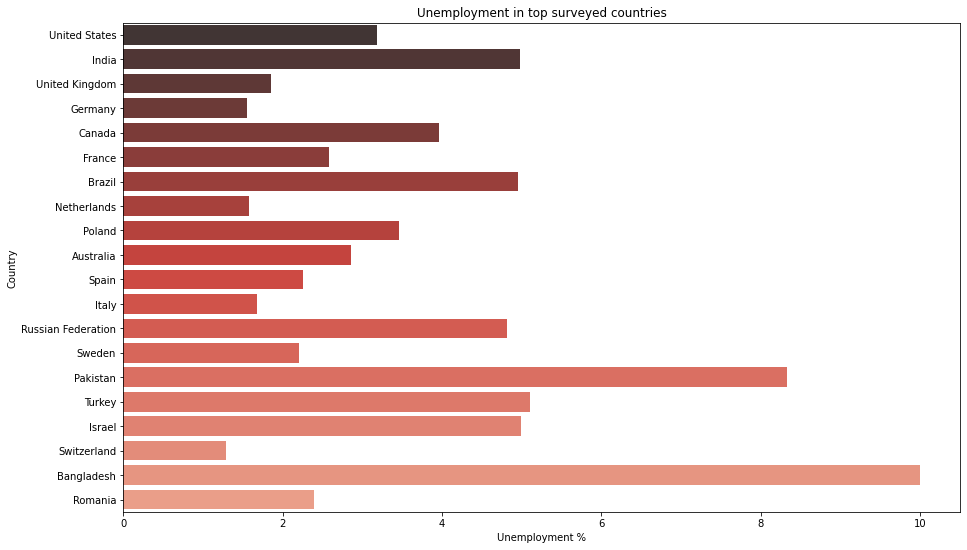

In [38]:
fig = plt.figure(figsize=(15,9))
sns.barplot(x=unemployment.loc[survey_country_sorted.index].head(20),y=survey_country_sorted.index[:20],palette='Reds_r_d')
plt.xlabel('Unemployment %')
plt.title('Unemployment in top surveyed countries')
plt.show()

**6) Trending language next year**

In [39]:
survey['LanguageDesireNextYear']

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64461, dtype: object

In [50]:
survey['LNextYear']=survey['LanguageDesireNextYear'].str.split(';')

In [ ]:
survey['LNextYear']

In [52]:
survey_exploaded_lnextyear=survey.explode('LNextYear')
# survey_exploaded_lnextyear


In [53]:
survey.drop(columns='LNextYear',inplace=True)
survey_exploaded_lnextyear.drop(columns='LanguageDesireNextYear',inplace=True)

In [54]:
survey_exploaded_lnextyear

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,LNextYear
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,C#
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,HTML/CSS
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone

In [55]:
lnext_respondent=survey_exploaded_lnextyear.groupby('LNextYear')['Respondent'].nunique().sort_values(ascending=False)

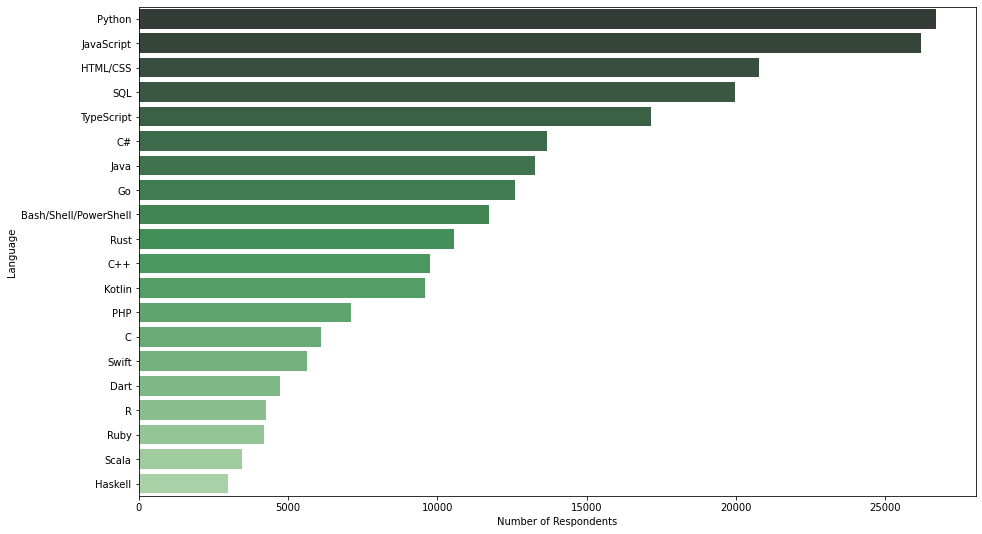

In [56]:
fig = plt.figure(figsize=(15,9))
sns.barplot(x=lnext_respondent[:20],y=lnext_respondent[:20].index,palette='Greens_r_d')
plt.xlabel('Number of Respondents')
plt.ylabel('Language')
plt.show()

**7) Trending platforms(OS) for next year**

In [60]:
survey['PlatformDesireNextYear']

0           Android;iOS;Kubernetes;Microsoft Azure;Windows
1                               iOS;Kubernetes;Linux;MacOS
2                                                      NaN
3                                                      NaN
4        Docker;Google Cloud Platform;Heroku;Linux;Windows
                               ...                        
64456                                                  NaN
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                   Arduino;Linux;Raspberry Pi;Windows
Name: PlatformDesireNextYear, Length: 64461, dtype: object

In [58]:
survey['PNextYear'] = survey['PlatformDesireNextYear'].str.split(';')
survey_exploaded_pnextyear = survey.explode('PNextYear')
print(survey_exploaded_pnextyear)
survey.drop(columns='PNextYear',inplace=True)

       Respondent                      MainBranch  ... YearsCodePro        PNextYear
0               1  I am a developer by profession  ...           27          Android
0               1  I am a developer by profession  ...           27              iOS
0               1  I am a developer by profession  ...           27       Kubernetes
0               1  I am a developer by profession  ...           27  Microsoft Azure
0               1  I am a developer by profession  ...           27          Windows
...           ...                             ...  ...          ...              ...
64459       64925                             NaN  ...          NaN              NaN
64460       65112                             NaN  ...          NaN          Arduino
64460       65112                             NaN  ...          NaN            Linux
64460       65112                             NaN  ...          NaN     Raspberry Pi
64460       65112                             NaN  ...          N

In [59]:
survey_exploaded_pnextyear.drop(columns='PlatformDesireNextYear',inplace=True)

In [61]:
pnext_respondent = survey_exploaded_pnextyear.groupby('PNextYear')['Respondent'].nunique().sort_values(ascending=False)


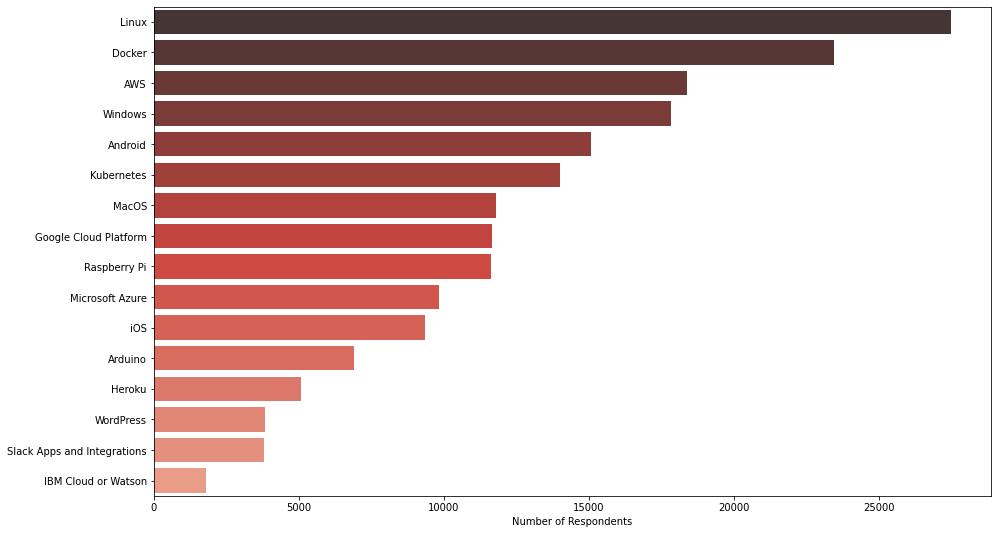

In [62]:
fig = plt.figure(figsize=(15,9))
sns.barplot(x=pnext_respondent[:20],y=pnext_respondent[:20].index,palette='Reds_r_d')
plt.xlabel('Number of Respondents')
plt.ylabel('')
plt.show()

**8) hours per week working**

In [63]:
survey[survey['WorkWeekHrs'] >= 168].count()

Respondent            93
MainBranch            93
Hobbyist              93
Age                   72
Age1stCode            93
                      ..
WebframeWorkedWith    61
WelcomeChange         78
WorkWeekHrs           93
YearsCode             92
YearsCodePro          93
Length: 61, dtype: int64

In [65]:
survey.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [64]:
survey[survey['WorkWeekHrs']<168]['WorkWeekHrs']
 

0        50.0
3        40.0
7        39.0
8        50.0
9        36.0
         ... 
64141    35.0
64142     4.0
64148    40.0
64153    45.0
64154    40.0
Name: WorkWeekHrs, Length: 41058, dtype: float64

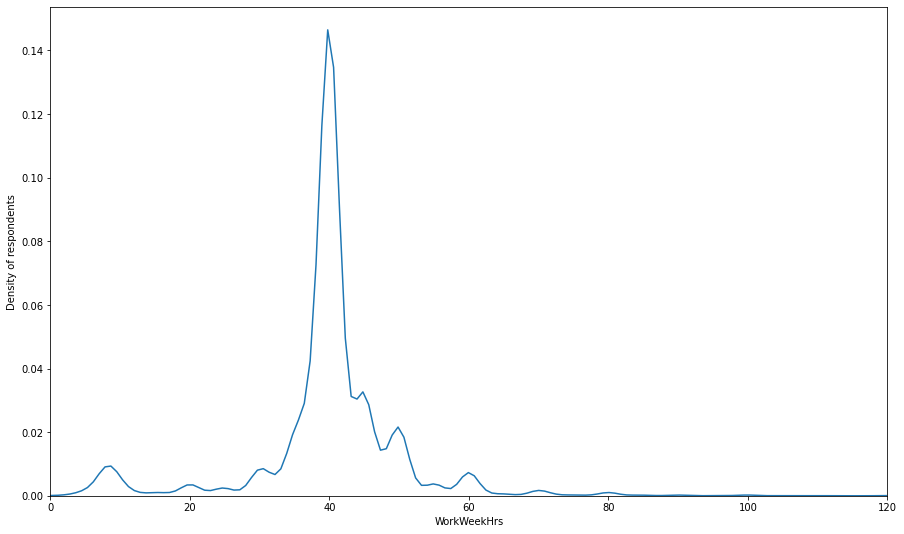

In [84]:
fig = plt.figure(figsize=(15,9))
sns.kdeplot(survey[survey['WorkWeekHrs'] < 168]['WorkWeekHrs'],label='All')
plt.ylabel('Density of respondents')
plt.xlim(0,120)
plt.show()